- 学修番号: 22745102
- 氏名: 岩間和也

# 課題 1.2　ロジスティック回帰分析

ロジスティック回帰のインスタンス作成時のオプション指定：
- C=10000.0 を指定すること `LogisticRegression(C=10000.0)`
- 必要に応じて適当な値の max_iter も指定すること `LogisticRegression(C=10000.0, max_iter=100000)`

In [1]:
import pandas as pd

autos = pd.read_csv('data/imports-85.data', na_values='?')
autos.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
                    'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
                    'wheel_base', 'length','width', 'height', 'curb_weight',
                    'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
                    'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
                    'city_mpg', 'highway_mpg','price']
# 表示する最大列数の設定
pd.set_option('display.max_columns', len(autos.columns))
# 欠損値 NaN がある行の除去
autos = autos.dropna()
# 確認
autos

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<hr>

### 1.2.1 市街地での燃費の良し悪しと馬力との関係

autos から city_mpg, highway_mpg 列を除外したうえで、city_mpgから中央値よりも大きければ1、小さいか等しければ0を値としたcity_mpg_01列を追加した pandas DataFrame を作成しなさい。

そのDataFrameについて、X軸を horsepower , Y軸を height として、city_mpg_01で色分けをした散布図を作成しなさい。

<AxesSubplot:xlabel='horsepower', ylabel='height'>

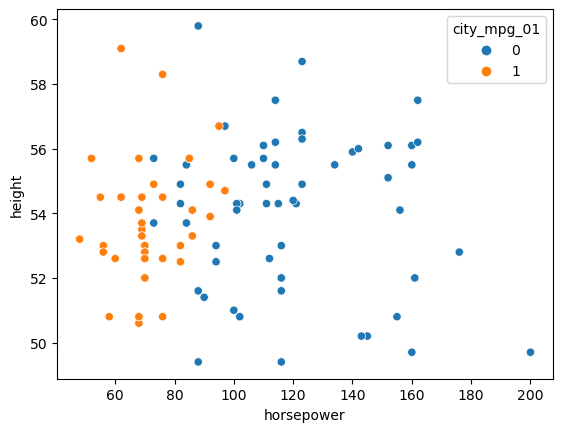

In [2]:
import seaborn as sns

# city_mpgの中央値を求める
city_mpg_median = autos['city_mpg'].median()
# city_mpg_01を追加
autos['city_mpg_01'] = autos['city_mpg'].map(lambda x: 1 if x > city_mpg_median else 0)

labels = autos.describe().columns.drop(['city_mpg', 'highway_mpg']).sort_values()
df = autos.loc[:, labels]

# 散布図を表示
sns.scatterplot(x=df.horsepower, y=df.height, hue=df.city_mpg_01)

<hr>

### 1.2.2 馬力からの燃費の良し悪しの予測

horsepower を説明変数, city_mpg_01 を目的変数とするロジスティック回帰モデルを作成し、AUC値を求め、また回帰係数 β_0 (切片), β_1 (傾き) を表示しなさい。<br>
AUC, 回帰係数ともに、小数点以下4桁目を四捨五入し、小数点以下3桁まで答えること（0.7625ならば0.763が答え）。

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

def calc_AUC(model, X, Y):
    Y_proba = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, Y_proba[:, 1])
    return auc(fpr, tpr)

X = autos[['horsepower']]
Y = autos[['city_mpg_01']]
model = LogisticRegression(C=10000.0)
model.fit(X, Y)
# aucの算出
val_auc = calc_AUC(model, X, Y)
print('AUC')
print(val_auc)

# 回帰係数 β_0の算出
b_0 = model.coef_[0][0]
print('β_0')
print(b_0)

# 回帰係数　β_1の算出
b_1 = model.intercept_[0]
print('β_1')
print(b_1)


AUC
0.9629835129993659
β_0
-0.16012027076203847
β_1
14.132647959564796


/Users/kazuya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<hr>

### 以上より
### AUC: 0.963
### β_0: -0.160
### β_1: 14.133

<hr>

### 1.2.3 燃費の良し悪しと他の原因との関係

horsepower, curb_weight, aspiration を説明変数、city_mpg_01 を目的変数とするロジスティック回帰モデルを作成し、
1. AUC値を求めなさい。<br>
小数点以下4桁目を四捨五入し、小数点以下3桁まで答えること（0.7625ならば0.763が答え）。
2. aspiration が turbo かそうではないかのそれぞれについて、作成したモデルに対する説明変数の値として curb_weight は中央値に固定したうえで、X軸に horsepower をとり最小値から最大値まで変化させ、Y軸に city_mpg_01=1 になる確率（シグモイド曲線）をグラフで描画しなさい。
  - グラフが turbo かそうではないかわかるように、色分けして表示すること。
  - できれば legend を付けること。付けられなければ、コメントやMarkdownのセルに文章を記載し補足すること。
3. 結果を考察しなさい。

<hr>

### 1. AUCの算出

In [4]:
# 1 AUC
_data = autos[['horsepower', 'curb_weight', 'aspiration']]
X2 = pd.get_dummies(data=_data, drop_first=True)
Y2 = autos.city_mpg_01
model2 = LogisticRegression(C=10000.0)
model2.fit(X2, Y2)
val_auc2 = calc_AUC(model2, X2, Y2)
print(val_auc2)

0.9652821813570069


<hr>

### よって　AUC: 0.965

<hr>

### 2. シグモイド曲線の描画

<hr>
### 前提

- curb_weightを中央値に固定
- これはcurb_weightが定数化したと判断し、説明変数から除外することとして解釈した

### 試行錯誤しても意図したような結果のシグモイド曲線をつくることができなかったため、過程のみ記述します
### レポート締切後の授業で解説をよろしくお願いします

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 標準シグモイド関数の定義
def sigmoid(x, b0, b1):
    return 1 / (1 + np.exp(-(b0 + b1 * x)))

curb_weight_median = autos['curb_weight'].median()

<hr>

### aspiration == 'turbo'の場合

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


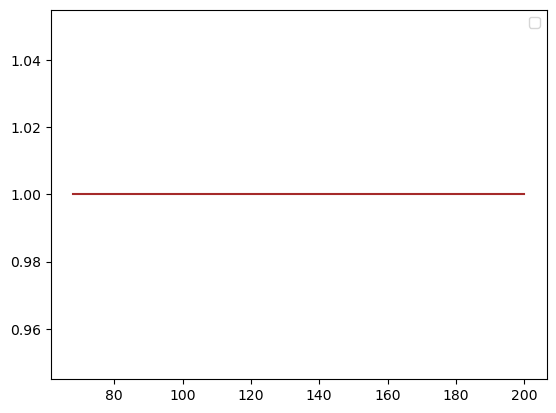

In [6]:
_autos3 = autos.query("aspiration == 'turbo'")
# curb_weight は説明変数から取り除く
_data3 = _autos3[['horsepower', 'aspiration']]

# curb_weightを除外、aspiration == turboのみのモデルを作成
X3 = pd.get_dummies(data=_data3, drop_first=False)
Y3 = _autos3.city_mpg_01
model3 = LogisticRegression(C=10000.0)
model3.fit(X3, Y3)

# 切片の導出
_max = int(X3.loc[:, 'horsepower'].max())
_min = int(X3.loc[:, 'horsepower'].min())
b1_3 = model3.intercept_[0]
b0_3 = model3.coef_[0][1]

# シグモイド曲線の描画
_step = (_max - _min) / 100
_X = np.arange(_min, _max + _step, _step)
plt.plot(_X, sigmoid(_X, b0_3, b1_3), color='brown')
plt.legend()
plt.show()

<hr>

### 上記のようにただの直線になってしまった

<hr>

### aspiration != turbo　の場合

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


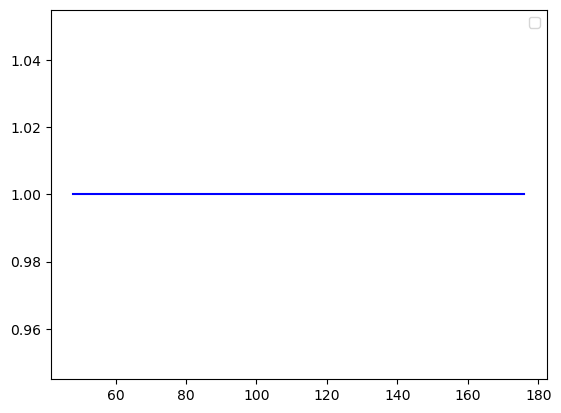

In [7]:
_autos4 = autos.query("aspiration != 'turbo'")
# curb_weight は説明変数から取り除く
_data4 = _autos4[['horsepower', 'aspiration']]

# curb_weightを除外、aspiration == turboのみのモデルを作成
X4 = pd.get_dummies(data=_data4, drop_first=False)
Y4 = _autos4.city_mpg_01
model4 = LogisticRegression(C=10000.0)
model4.fit(X4, Y4)

# 切片の導出
_max_4 = int(X4.loc[:, 'horsepower'].max())
_min_4 = int(X4.loc[:, 'horsepower'].min())
b1_4 = model4.intercept_[0]
b0_4 = model4.coef_[0][1]

# シグモイド曲線の描画
_step_4 = (_max_4 - _min_4) / 100
_X_4 = np.arange(_min_4, _max_4 + _step_4, _step_4)
plt.plot(_X_4, sigmoid(_X_4, b0_4, b1_4), color='blue')
plt.legend()
plt.show()

<hr>

### 上記のようにただの直線になってしまった

<hr>

### 3. 結果の考察

<hr>

### シグモイド曲線の作成ができなかったため考察はできなかった